# Exercice 4

## Partie 1: 

Soit X une variable aléatoire de loi de Bernoulli de paramètre p.
1. Proposer une fonction qui construit une réalisation de X 

In [6]:
import numpy as np

def bernoulli(p):
    U = np.random.uniform(0,1)
    return 1 if U <= p else 0

2. Fonction générant un k-éhantillon:

In [7]:
def echantillon_bernoulli(p, k):
    U = np.random.uniform(0,1,k)
    return (U <= p).astype(int)

3. Test pour différentes valeurs de p et k

In [8]:
p_values = [0.3,0.5,0.7]
k_values = [100,1000,10000]
for p in p_values:
    for k in k_values:
        ech = echantillon_bernoulli(p,k)
        print(f"p={p}, k={k}, moyenne={np.mean(ech):.4f} (théorique={p})")

p=0.3, k=100, moyenne=0.4100 (théorique=0.3)
p=0.3, k=1000, moyenne=0.2920 (théorique=0.3)
p=0.3, k=10000, moyenne=0.2970 (théorique=0.3)
p=0.5, k=100, moyenne=0.5700 (théorique=0.5)
p=0.5, k=1000, moyenne=0.4950 (théorique=0.5)
p=0.5, k=10000, moyenne=0.4962 (théorique=0.5)
p=0.7, k=100, moyenne=0.7600 (théorique=0.7)
p=0.7, k=1000, moyenne=0.6980 (théorique=0.7)
p=0.7, k=10000, moyenne=0.7043 (théorique=0.7)


## Partie 2:

Simuler une variable aléatoire X de loi binomiale de paramètres (n;p) pour différentes valeurs de n et p

- loi binomiale

In [9]:
def binomiale(n,p,k):
    U = np.random.uniform(0,1,(k,n))
    return np.sum(U<=p, axis=1)

- test

In [10]:
n,p,k = 10,0.4,10000
ech = binomiale(n,p,k)
print(f"n={n}, p={p}, k={k}, moyenne={np.mean(ech):.4f} (théorique={n*p})")
print(f"Variance empirique={np.var(ech):.4f} (théorique={n*p*(1-p):.4f})")

n=10, p=0.4, k=10000, moyenne=4.0055 (théorique=4.0)
Variance empirique=2.4103 (théorique=2.4000)


# Exercice 5

## Loi Géométrique

- Méthode 1: Via Bernoulli

In [11]:
def geo_bernoulli(p):
    N = 0
    while True:
        N +=1
        if bernoulli(p) == 1:
            return N

def echantillon_geo_bernoulli(p,k):
    return np.array([geo_bernoulli(p) for _ in range(k)])

- Méthode 2: Via inversion - formule directe

In [12]:
def geometrique(p,k):
    U = np.random.uniform(0,1,k)
    return 1 + np.floor(np.log(1-U)/np.log(1-p)).astype(int)

- comparaison des deux méthodes

In [13]:
import time
p,k=0.4,10000
start = time.time()
ech = echantillon_geo_bernoulli(p,k)
t1 = time.time() - start
start = time.time()
ech2 = geometrique(p,k)
t2 = time.time() - start
print(f"Méthode 1: moyenne={np.mean(ech):.4f}, temps={t1:.4f} secondes")
print(f"Méthode 2: moyenne={np.mean(ech2):.4f}, temps={t2:.4f} secondes")
print(f"Théorique={1/p:.4f}")

Méthode 1: moyenne=2.4884, temps=0.0290 secondes
Méthode 2: moyenne=2.4922, temps=0.0010 secondes
Théorique=2.5000


**Conclusion:** La méthode directe est bien plus rapide car elle vectorise le calcul sans boucle

# Exercice 6

In [14]:
import numpy as np
import matplotlib.pyplot as plt

simulation

In [15]:
k = 10000
U = np.random.uniform(0,1,k)
X = U ** 0.5


vérification empirique

In [16]:
print(f"Moyenne empirique={np.mean(X):.4f} (théorique={2/3:.4f})")
print(f"Variance empirique={np.var(X):.4f} (théorique={1/18:.4f})")

Moyenne empirique=0.6638 (théorique=0.6667)
Variance empirique=0.0557 (théorique=0.0556)


Visualisation de la densité

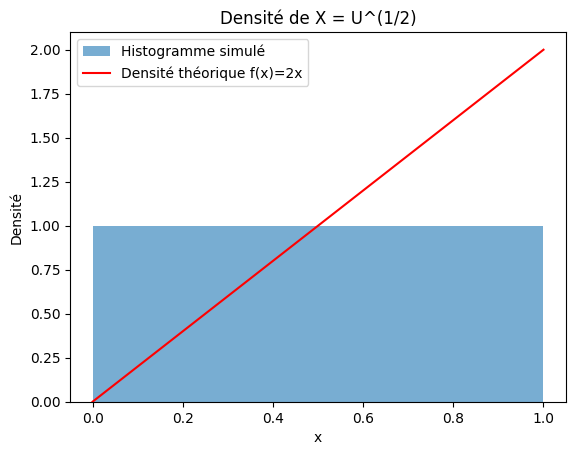

In [17]:
X = np.linspace(0,1,200)
plt.hist(X, bins=100, density=True, alpha=0.6, label='Histogramme simulé')
plt.plot(X, 2*X, 'r-', label='Densité théorique f(x)=2x')
plt.xlabel('x')
plt.ylabel('Densité')
plt.title('Densité de X = U^(1/2)')
plt.legend()
plt.show()

# Exercice 7

In [18]:
import matplotlib.pyplot as plt
import numpy as np

simulation

In [19]:
k = 10000
U = np.random.uniform(0,1,k)
X = -np.log(U)
Y = -np.log(1-U)

vérification: X et Y proche de Exp(1) donc E = 1 et Var = 1

In [21]:
print(f"Moyenne empirique E(X)={np.mean(X):.4f} (théorique=1)")
print(f"Variance empirique Var(X)={np.var(X):.4f} (théorique=1)")
print(f"Moyenne empirique E(Y)={np.mean(Y):.4f} (théorique=1)")
print(f"Variance empirique Var(Y)={np.var(Y):.4f} (théorique=1)")

Moyenne empirique E(X)=1.0217 (théorique=1)
Variance empirique Var(X)=1.0490 (théorique=1)
Moyenne empirique E(Y)=0.9826 (théorique=1)
Variance empirique Var(Y)=0.9793 (théorique=1)


visualisation

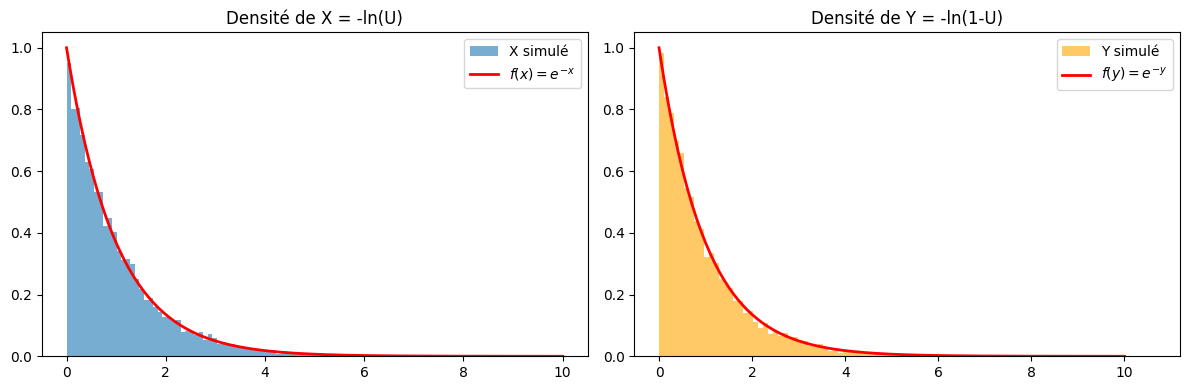

In [22]:
t = np.linspace(0,10,200)
fig, axes = plt.subplots(1,2, figsize=(12,4))
axes[0].hist(X, bins=100, density=True, alpha=0.6, label='X simulé')
axes[0].plot(t, np.exp(-t), 'r-', linewidth=2, label='$f(x)=e^{-x}$')
axes[0].set_title('Densité de X = -ln(U)')
axes[0].legend()

axes[1].hist(Y, bins=100, density=True, alpha=0.6, label='Y simulé', color='orange')
axes[1].plot(t, np.exp(-t), 'r-', linewidth=2, label='$f(y)=e^{-y}$')
axes[1].set_title('Densité de Y = -ln(1-U)')
axes[1].legend()

plt.tight_layout()
plt.show()

conclusion: même loi mais non indépendantes

In [23]:
print(f"\nCorrélation entre X et Y : {np.corrcoef(X, Y)[0,1]:.4f}")



Corrélation entre X et Y : -0.6403
